# Evaluate Metrics

In this notebook, we give some examples on how to visualize the calculated galaxy data set metrics. <br>
We assume that the generated data set and training data set are available

In [108]:
# Depending on the epoch, the results can vary slightly but not substantially. The data is generated based on the epoch with the lowest FID. 
GENERATED_FILE = '/mnt/data/tum_bib_upload/galaxies-metrics-denoising/final/SKIRT_StyleGAN.h5'

# Depending on the SKIRT data set (full or train/val/test split) the values of metrics can vary slightly.

# FULL data set-
TRAINING_FILE = '/mnt/data/denoising/TNG_channel_a64_sdss99_full_r0.h5'

# Train split that was used as training data for the generative models. 
# TRAINING_FILE = '/mnt/data/ALAE-TNG/v2/train/train_TNG_channel_a64_sdss99r0.h5'

TYPE = 'SKIRT'

Next, we compute the corresponding metrics. We recommend running the metrics script as described in the `README.md` from the terminal and not in the notebook first. <br> 
Then the results will already be cached and can be loaded in the notebook 

In [109]:
import sys
sys.path.append('../metrics')
from run_metrics import calculate_metrics

results = calculate_metrics(GENERATED_FILE, TRAINING_FILE, TYPE, cache='../metrics/cache')

Calculating 2D powerspectra
Loaded ../metrics/cache/TNG_channel_a64_sdss99_full_r0_raps.pkl
Loaded ../metrics/cache/SKIRT_StyleGAN_raps.pkl
Calculating FID
Loaded ../metrics/cache/TNG_channel_a64_sdss99_full_r0.pkl
Loaded ../metrics/cache/SKIRT_StyleGAN.pkl
Calculating KID
Loaded ../metrics/cache/TNG_channel_a64_sdss99_full_r0.pkl
Loaded ../metrics/cache/SKIRT_StyleGAN.pkl
Calculating morphological properties
Loaded ../metrics/cache/TNG_channel_a64_sdss99_full_r0_morph.pkl
Loaded ../metrics/cache/SKIRT_StyleGAN_morph.pkl


## FID and KID

The FID and KID values can be read out easily 

In [111]:
print(f'FID between GENERATED_FILE and TRAINING_FILE is {results["fid"]["fid"]:.2f}')
print(f'KID between GENERATED_FILE and TRAINING_FILE is {results["kid"]["kid"]:.7f}')

FID between GENERATED_FILE and TRAINING_FILE is 7.76
KID between GENERATED_FILE and TRAINING_FILE is 0.0053302


## 2D Power Spectrum

We also compute the Wasserstein distance of the distribution of magnitudes in the 2D power spectrum grouped by different frequency (or wavelength) ranges. <br>
For a more detailed description of this metric, see Section 4.1.2 in our paper. <br>
First we import all necessary functions

In [112]:
from utils import get_powerspectrum_dataframe
from radially_averaged_power_spectrum import get_partition_list

We obtain the results as a pandas dataframe

In [113]:
powerspectrum_results = get_powerspectrum_dataframe(results)
powerspectrum_results

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,avg
name,,,,,,,,,,,,,,,,
w_dist,0.057421,0.044149,0.032078,0.035434,0.034263,0.033408,0.038010,0.046978,0.054779,0.062076,0.071917,0.083808,0.098799,0.117622,0.136057,0.063120
mean_training,-0.062880,-0.253970,-0.504844,-0.691327,-0.837950,-0.973673,-1.090336,-1.192472,-1.286877,-1.368499,-1.443516,-1.510222,-1.573307,-1.634888,-1.689686,-1.074296
std_training,0.347760,0.341758,0.350174,0.356194,0.355743,0.354187,0.353885,0.352262,0.350725,0.349431,0.348180,0.347119,0.345571,0.344636,0.344099,0.349448
mean_generated,-0.120285,-0.298099,-0.536278,-0.725562,-0.870610,-1.003367,-1.124326,-1.235977,-1.338513,-1.427672,-1.513093,-1.592343,-1.670781,-1.751582,-1.825091,-1.135572
std_generated,0.363625,0.356252,0.366492,0.374120,0.371410,0.368123,0.368137,0.369403,0.371315,0.373281,0.375015,0.376368,0.378778,0.381394,0.385395,0.371941


The row `w_dist` displays the 1D Wasserstein distance between the generated data and the training data for each frequency range. <br>
The other four rows give the mean and standard deviation within each frequency range.

The frequency is partitioned as follows (compare to Section 4.1.2 in the paper)

In [76]:
partition_list = get_partition_list()
{f'mode {mode}' : partition_list[mode] for mode in range(len(partition_list))}

{'mode 0': 0,
 'mode 1': (0, 0.014012330851149009),
 'mode 2': (0.014012330851149009, 0.035030827127872526),
 'mode 3': (0.035030827127872526, 0.06305548883017054),
 'mode 4': (0.06305548883017054, 0.11209864680919207),
 'mode 5': (0.11209864680919207, 0.1681479702137881),
 'mode 6': (0.1681479702137881, 0.23820962446953314),
 'mode 7': (0.23820962446953314, 0.32228360957642727),
 'mode 8': (0.32228360957642727, 0.4203699255344703),
 'mode 9': (0.4203699255344703, 0.5324685723436623),
 'mode 10': (0.5324685723436623, 0.651573384578429),
 'mode 11': (0.651573384578429, 0.791696693089919),
 'mode 12': (0.791696693089919, 0.9388261670269836),
 'mode 13': (0.9388261670269836, 1.0999679718151973),
 'mode 14': (1.0999679718151973, 1.2681159420289854)}

We now visualize the 2D power spectrum using a contour plot for each data file (generated data left, training data right). <br>
The journal version looks slightly different from the plot below, since it shows a different (later) epoch in the journal. <br>
We noticed that while the FID and the metrics for the power spectrum do not improve after some point in the training, <br>
the power spectrum contour plots for the generated data can still visually improve and match the SKIRT data more closely. 

 84%|████████▎ | 9999/11961 [01:30<00:17, 110.56it/s]


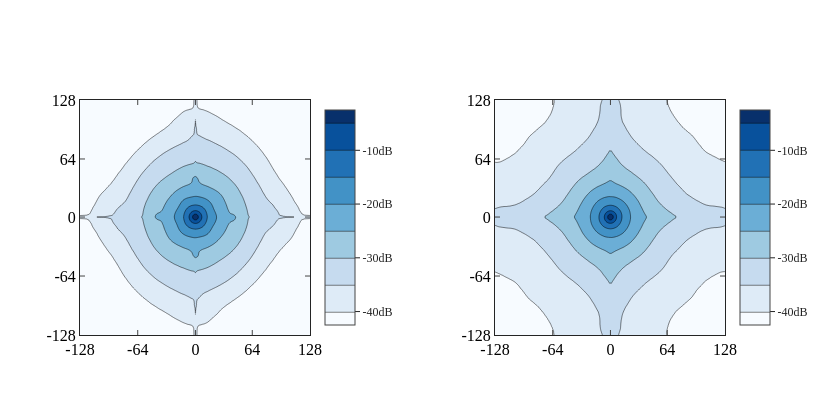

In [77]:
from plot import *

image_generated = plot_avg_powerspectra(GENERATED_FILE, resize_transform=256, max_size=256, downscale=1, ticks_n=64, savename='pictures/GENERATED_powerspectrum.pdf')
image_training = plot_avg_powerspectra(TRAINING_FILE, resize_transform=256, max_size=256, downscale=1, ticks_n=64, savename='pictures/TRAINING_powerspectrum.pdf')
combine_images(image_generated, image_training)

## Morphological Measurements

For each file, the morphological measurements are computed and stored separately 

In [101]:
import pandas as pd

morph_SKIRT, morph_StyleGAN = results['morph']

We construct a pandas DataFrame for each data set and join them

In [102]:
for key in morph_SKIRT:
    morph_SKIRT[key].update({'key' : key})
for key in morph_StyleGAN:
    morph_StyleGAN[key].update({'key' : key})

morph_SKIRT = pd.DataFrame(morph_SKIRT).T
morph_StyleGAN = pd.DataFrame(morph_StyleGAN).T

morph_SKIRT['source'] = 'SKIRT'
morph_StyleGAN['source'] = 'StyleGAN'

data_morph_full = pd.concat([morph_SKIRT, morph_StyleGAN])
data_morph_full = data_morph_full.reset_index()

We remove some outliers

In [106]:
data_morph_full = data_morph_full.loc[data_morph_full['sersic_n'] <= 10]
data_morph_full = data_morph_full.loc[data_morph_full['asymmetry'] <= 1]
data_morph_full = data_morph_full.loc[data_morph_full['asymmetry'] >= -1]
data_morph_full = data_morph_full.loc[data_morph_full['smoothness'] >= -0.05]
data_morph_full = data_morph_full.loc[data_morph_full['smoothness'] <= 0.2]
data_morph_full = data_morph_full.loc[data_morph_full['rhalf_circ'] <= 60]

Now, we can easily group morphological measurements by the data set source and print statistics

In [107]:
data_morph_full.groupby('source').describe()['asymmetry']

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
SKIRT,11503.0,0.187679,0.138500,-0.280741,0.065068,0.171130,0.277126,0.911755
StyleGAN,48276.0,0.170241,0.115253,-0.712787,0.077585,0.151694,0.245843,0.851065


Finally, we display the histograms using

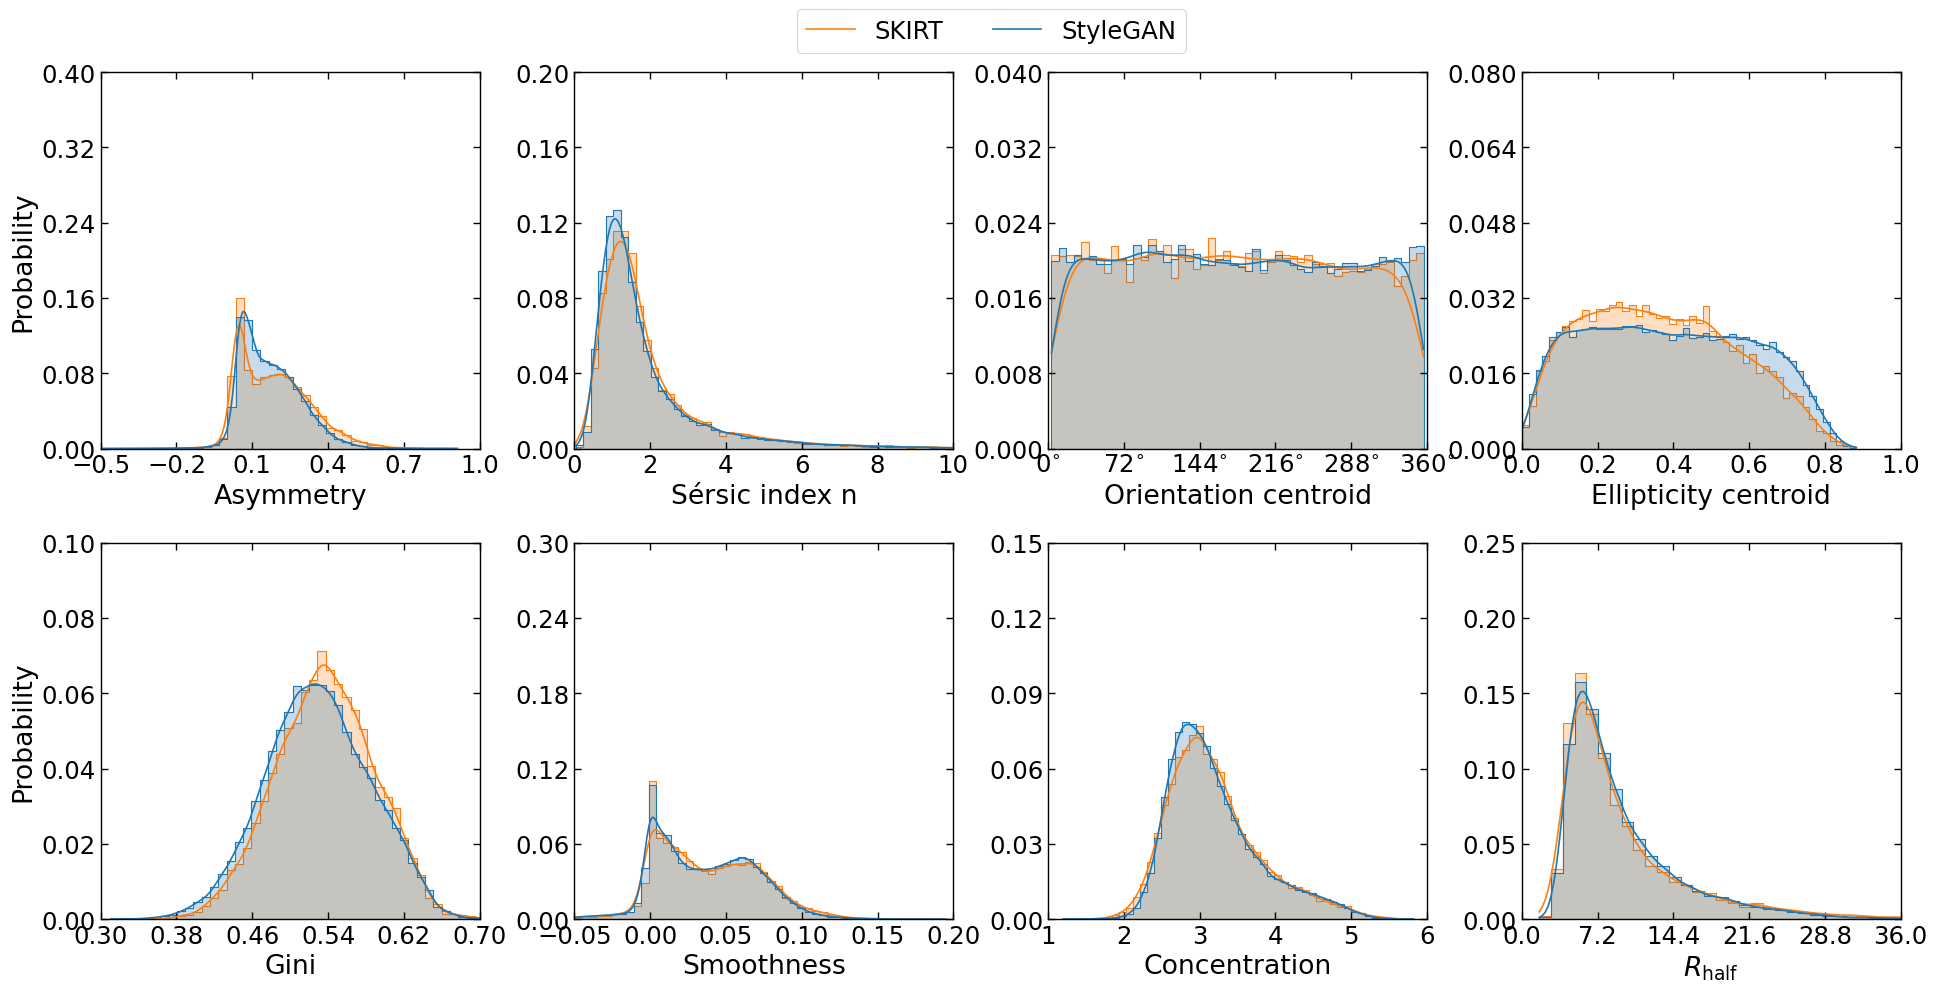

In [82]:
from plot import show_morph_properties
show_morph_properties(data_morph_full)